In [1]:
import pandas as pd
from datetime import datetime

# Plotly Method Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
pliki = ['CIECH.mst', 'GRUPAAZOTY.mst', 'PCCROKITA.mst', 'POLICE.mst', 'POLWAX.mst']

In [2]:
CIE = pd.read_csv('./DANE/CIECH.mst',parse_dates=True)
ATT = pd.read_csv('./DANE/GRUPAAZOTY.mst',parse_dates=True)
PCR = pd.read_csv('./DANE/PCCROKITA.mst',parse_dates=True)
PCE = pd.read_csv('./DANE/POLICE.mst',parse_dates=True)
PWX = pd.read_csv('./DANE/POLWAX.mst',parse_dates=True)

In [3]:
ticker = [CIE,ATT,PCR,PCE,PWX]

In [4]:
dict_Ticker={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close',
       '<VOL>':'Volume'}

In [5]:
#metoda .rename zamienia nazwy kolumn wg słownika
for tic in ticker:
    tic.rename(columns=dict_Ticker,inplace=True)

In [7]:
"""
CIE['Date']=pd.to_datetime(CIE['Date'],format="%Y%m%d")
ATT['Date']=pd.to_datetime(ATT['Date'],format="%Y%m%d")
PCR['Date']=pd.to_datetime(PCR['Date'],format="%Y%m%d")
PCE['Date']=pd.to_datetime(PCE['Date'],format="%Y%m%d")
PWX['Date']=pd.to_datetime(PWX['Date'],format="%Y%m%d")
"""

'\nCIE[\'Date\']=pd.to_datetime(CIE[\'Date\'],format="%Y%m%d")\nATT[\'Date\']=pd.to_datetime(ATT[\'Date\'],format="%Y%m%d")\nPCR[\'Date\']=pd.to_datetime(PCR[\'Date\'],format="%Y%m%d")\nPCE[\'Date\']=pd.to_datetime(PCE[\'Date\'],format="%Y%m%d")\nPWX[\'Date\']=pd.to_datetime(PWX[\'Date\'],format="%Y%m%d")\n'

In [6]:
#Zmiana typu kolumny date na typ znacznika czasowego
for tic1 in ticker:
    tic1['Date']=pd.to_datetime(tic1['Date'],format="%Y%m%d")

In [7]:
#Usuniecie kolumny 'Ticker'
for tic2 in ticker:
    tic2.drop(axis=1,columns=['Ticker'], inplace=True)

In [8]:
#Ustawienie kolumny Date jako index
for tic3 in ticker:
    tic3.set_index(keys='Date',inplace=True)

In [9]:
PWX.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-10-06,15.20,15.89,15.10,15.20,173438
2014-10-07,15.36,15.39,15.20,15.30,21739
2014-10-08,15.29,15.29,15.10,15.19,13842
2014-10-09,15.12,15.27,15.12,15.24,6125
2014-10-10,15.22,15.22,14.89,15.00,9078


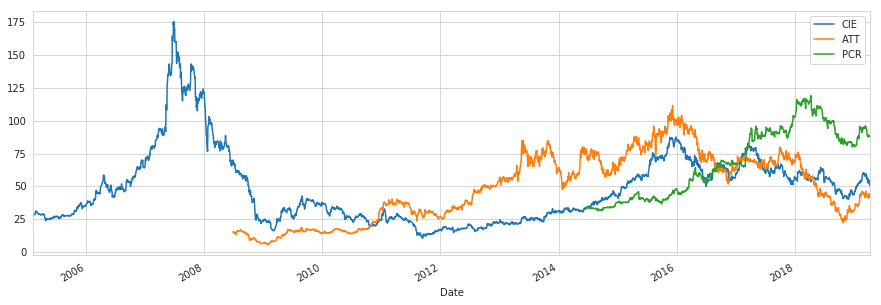

In [12]:
CIE['Close'].plot(figsize=(15,5),label='CIE')
ATT['Close'].plot(figsize=(15,5),label='ATT')
PCR['Close'].plot(figsize=(15,5),label='PCR')
#PCE['Close'].plot(figsize=(15,5),label='PCE')
#PWX['Close'].plot(figsize=(15,5),label='PWX')
plt.legend()

In [10]:
start_okres = '2014-10-06'
WIG_CHEMIA = ['CIE','ATT','PCR','PCE','PWX']

In [14]:
#złączenie wszytskich plików w jeden, gdzie wiersze odpowiadają dniom(index), nazwy kolumn pochadzą z listy WIG_CHEMIA
chemia_stock = pd.concat([CIE.loc[start_okres:],ATT.loc[start_okres:],PCR.loc[start_okres:],
                          PCE.loc[start_okres:],PWX.loc[start_okres:]],axis=1,keys=WIG_CHEMIA)

In [15]:
chemia_stock.columns.names = ['CHEMIA Ticker','Stock Info']

In [16]:
chemia_stock.xs(key='Close',axis=1,level='Stock Info').max()

CHEMIA Ticker
CIE     87.49
ATT    111.50
PCR    119.00
PCE     29.10
PWX     19.59
dtype: float64

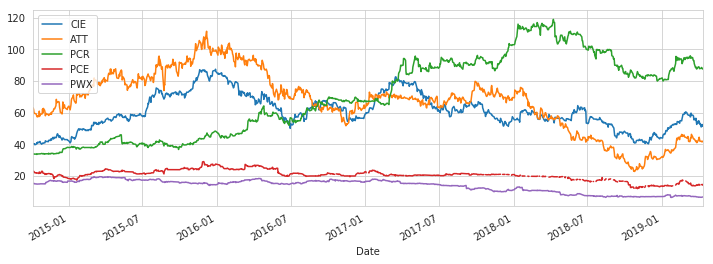

In [17]:
for tick in WIG_CHEMIA:
    chemia_stock[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend(loc='upper left')

In [18]:
returns = pd.DataFrame()

In [19]:
for tick in WIG_CHEMIA:
    returns[tick+' Return'] = chemia_stock[tick]['Close'].pct_change()
returns.head()

,CIE Return,ATT Return,PCR Return,PCE Return,PWX Return
Date,,,,,
2014-10-06,NaN,NaN,NaN,NaN,NaN
2014-10-07,0.000744,-0.016653,-0.003533,0.000870,0.006579
2014-10-08,-0.006196,-0.032258,0.001477,-0.021739,-0.007190
2014-10-09,0.006733,-0.006333,0.000000,-0.002222,0.003292
2014-10-10,-0.015358,-0.002013,-0.003245,-0.020045,-0.015748


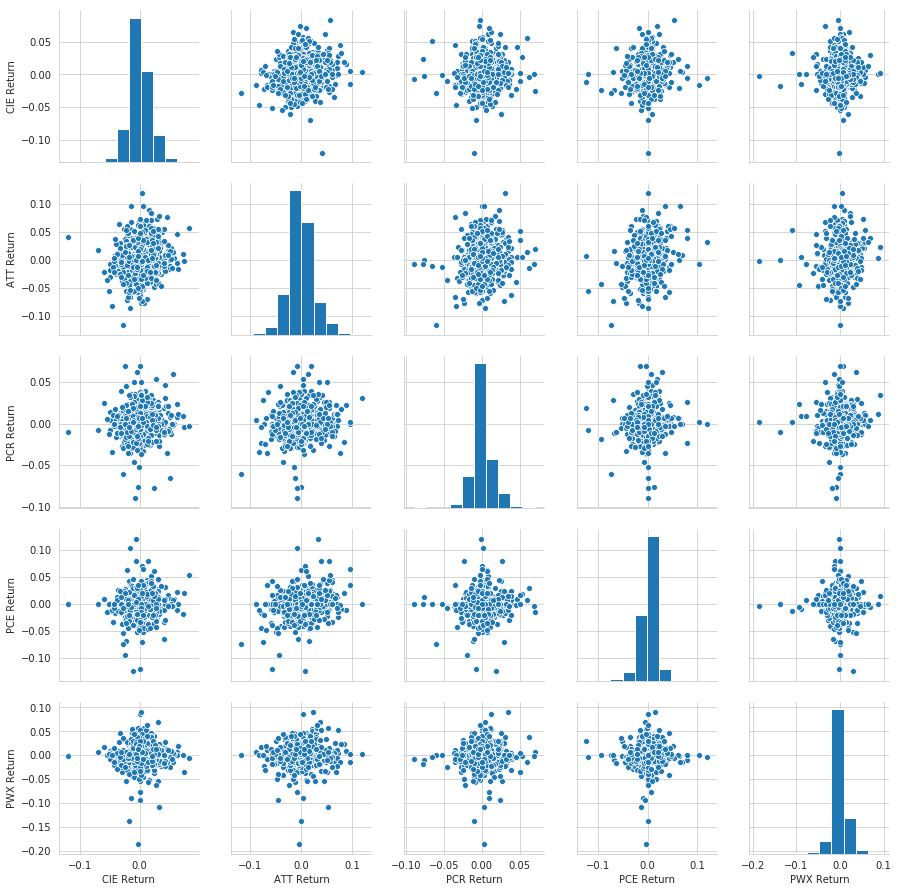

In [20]:
sns.pairplot(returns[1:])

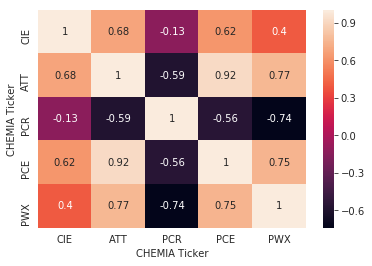

In [21]:
sns.heatmap(chemia_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# SMA - prosta średnia krocząca

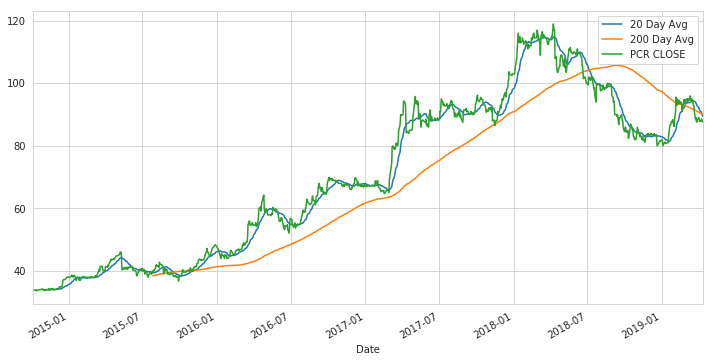

In [99]:
plt.figure(figsize=(12,6))
PCR['Close'].loc[start_okres:].rolling(window=20).mean().plot(label='20 Day Avg')
PCR['Close'].loc[start_okres:].rolling(window=200).mean().plot(label='200 Day Avg')
PCR['Close'].loc[start_okres:].plot(label='PCR CLOSE')
plt.legend()

# EMA - wykładnicza średnia krocząca

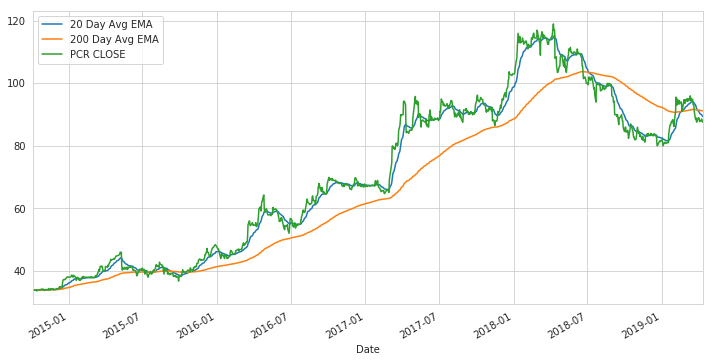

In [23]:
plt.figure(figsize=(12,6))
PCR['Close'].loc[start_okres:].ewm(span=20).mean().plot(label='20 Day Avg EMA')
PCR['Close'].loc[start_okres:].ewm(span=200).mean().plot(label='200 Day Avg EMA')
PCR['Close'].loc[start_okres:].plot(label='PCR CLOSE')
plt.legend()

# Wstęga Bollingera

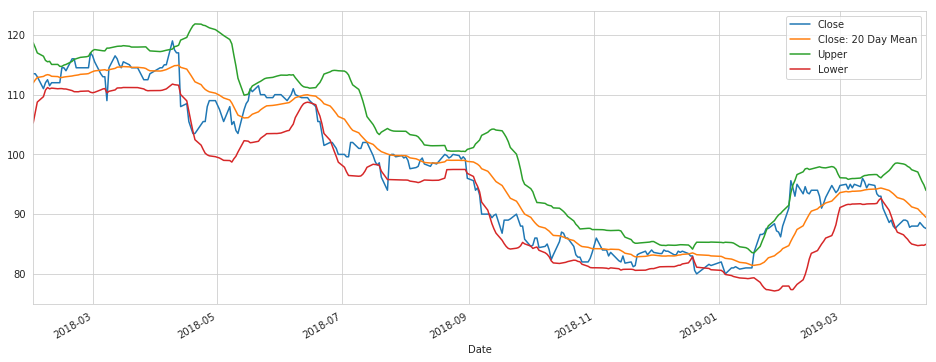

In [24]:
#close 20MA
PCR['Close: 20 Day Mean'] = PCR['Close'].rolling(20).mean()
#upper = 20MA + 2 * std(20)
PCR['Upper'] = PCR['Close: 20 Day Mean']+2*(PCR['Close'].rolling(20).std())
#lower = 20MA + 2 * std(20 )
PCR['Lower'] = PCR['Close: 20 Day Mean']-2*(PCR['Close'].rolling(20).std())
#Close - WYSWIETLENIE 300 OSTATNICH ZDARZEN tail(300)
PCR[['Close','Close: 20 Day Mean','Upper','Lower']].tail(300).plot(figsize=(16,6))

# ETS

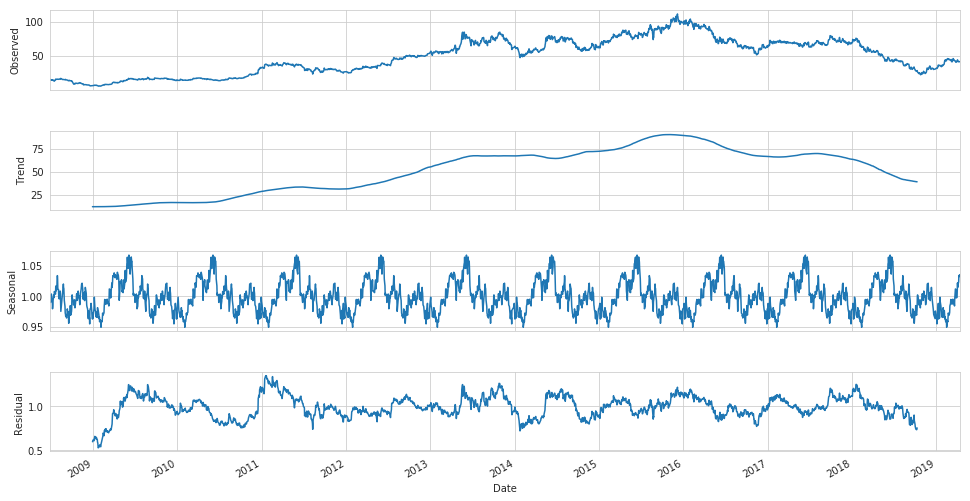

In [25]:
#okreslenie freq, przyjmuje ze jest to jeden rok (251)-tyle jest wierszy dla jednego roku
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ATT['Close'], model='multiplicative',freq=251)
fig = result.plot()
fig.set_size_inches(15,8)

# RSI - Relative Strength Index
#### Wskaźnik Relative Strength Index porównuje ruchy wzrostowe i spadkowe cen zamknięcia w danym okresie czasu. Jego wartość jest obliczana na podstawie średniej wartości wzrostu cen zamknięcia z danego okresu oraz średniej wartości spadku cen zamknięcia z tego samego okresu.


RSI = 100 - [100 / [1+ RS]]

         
RS = Średni wzrost ceny w ostatnich k notowaniach / Średni spadek ceny w ostatnich k notowaniach

In [21]:
rsi_period = 14
zmiana = PCR['Close'].diff(1)
PCR['gain'] = zmiana.mask(zmiana<0.0)
PCR['loss'] = zmiana.mask(zmiana>0.0)
#Calculate the SMA
PCR['avg_gain_sma'] = PCR['gain'].rolling(min_periods=1, window=14).mean()
PCR['avg_loss_sma'] = PCR['loss'].rolling(min_periods=1, window=14).mean()
#Calculate the EWMA
PCR['avg_gain'] = PCR['gain'].ewm(com=rsi_period-1, min_periods=rsi_period).mean()
PCR['avg_loss'] = PCR['loss'].ewm(com=rsi_period-1, min_periods=rsi_period).mean()
#Calculate the RSI
PCR['rs'] = abs(PCR['avg_gain']/PCR['avg_loss'])
PCR['rsi'] = 100 - (100/(1+PCR['rs']))
PCR['rs1'] = abs(PCR['avg_gain_sma']/PCR['avg_loss_sma'])
PCR['rsi1'] = 100 - (100/(1+PCR['rs1']))

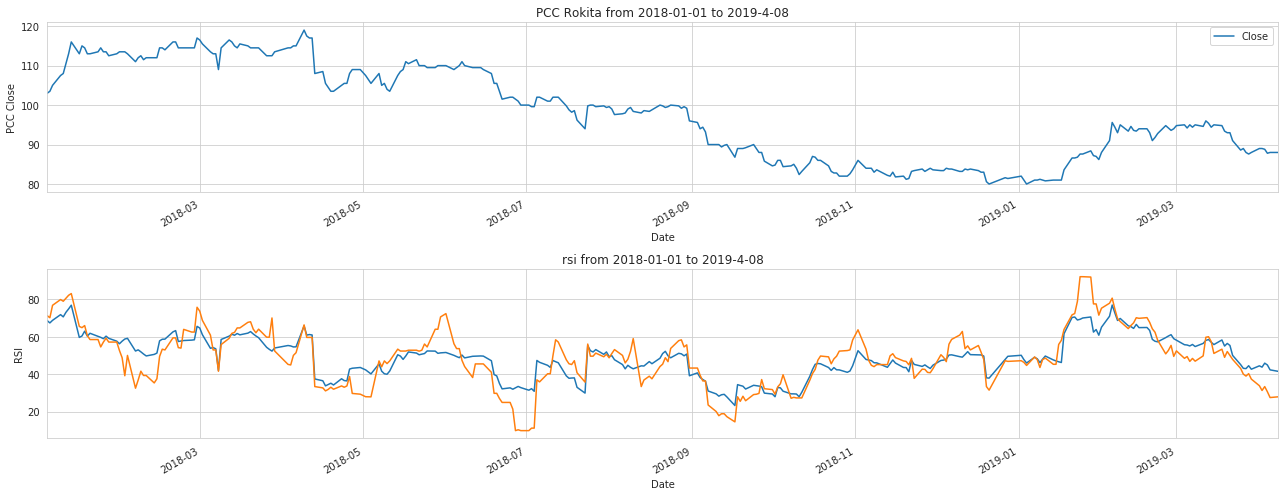

In [22]:
#WYKRES
start_day = '2018-01-01'
end_day ='2019-4-08'
period = (PCR.index>=start_day)&(PCR.index<=end_day)

fig = plt.figure(figsize=(18,7))
plt.subplot(2,1,2)
plt.title(f'rsi from {start_day} to {end_day}')
plt.ylabel('RSI')
graph_rsi = PCR.loc[period,'rsi'].plot()
graph_rsi = PCR.loc[period,'rsi1'].plot()

plt.subplot(2,1,1)
plt.title(f'PCC Rokita from {start_day} to {end_day}')
plt.ylabel('PCC Close')
graph_close = PCR.loc[period,'Close'].plot()
plt.tight_layout()
plt.legend()
plt.show()

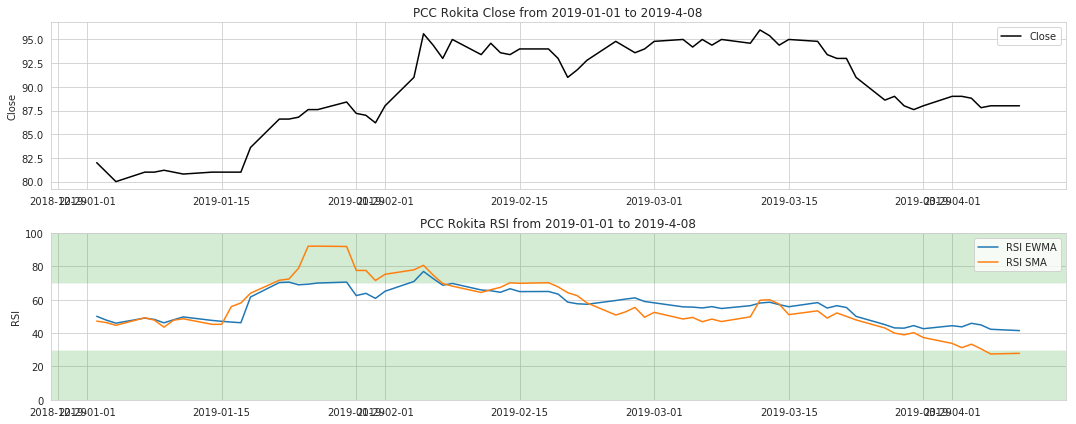

In [85]:
#WYKRES
start_day = '2019-01-01'
end_day ='2019-4-08'
period = (PCR.index>=start_day)&(PCR.index<=end_day)
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(15,6))

axes[0].set_title(f'PCC Rokita Close from {start_day} to {end_day}')
axes[0].set_ylabel('Close')
axes[0].plot(PCR.loc[period,'Close'],label='Close', color='black')
axes[1].set_title(f'PCC Rokita RSI from {start_day} to {end_day}')
axes[1].set_ylabel('RSI')
axes[1].plot(PCR.loc[period,'rsi'], label=('RSI EWMA'))
axes[1].plot(PCR.loc[period,'rsi1'], label=('RSI SMA'))
axes[1].set_ylim([0, 100])
#axes[1].axhline(y=30, linewidth=1,linestyle= '--',color = 'purple')
axes[1].axhspan(70, 100, facecolor='#2ca02c', alpha=0.2)
axes[1].axhspan(0, 30, facecolor='#2ca02c', alpha=0.2)
axes[1].legend()
axes[0].legend()
fig.tight_layout()

# I Sharp Ratio
## 1.1 Normalize Prices (cumulative daily returns)

In [13]:
for stock_df in (CIE,ATT,PCR,PCE,PWX):
    stock_df['Normed Return'] = stock_df['Close']/stock_df.iloc[0]['Close']

In [14]:
PCR.head()

,Open,High,Low,Close,Volume,Normed Return
Date,,,,,,
2014-06-25,36.00,36.00,33.16,33.16,84521,1.000000
2014-06-26,33.26,35.30,33.26,34.38,14169,1.036791
2014-06-27,34.46,35.00,34.45,34.54,2061,1.041616
2014-06-30,34.56,34.99,34.56,34.80,1800,1.049457
2014-07-01,34.91,34.91,34.49,34.50,328,1.040410


## 1.2 Allocation
### ustawiamy udział procentowy poszczególnych akcji w portfelu np:
- CIE 30%
- ATT 20%
- PCR 30%
- PCE 10%
- PWX 10%

#### calość ma dać 100%

In [28]:
for stock_df, allo in zip([CIE,ATT,PCR,PCE,PWX],[.3,.2,.3,.1,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [29]:
CIE.head()

,Open,High,Low,Close,Volume,Normed Return,Allocation
Date,,,,,,,
2005-02-10,29.6,30.0,28.0,28.1,1397541,1.000000,0.300000
2005-02-11,28.4,28.4,27.9,28.3,146970,1.007117,0.302135
2005-02-14,28.2,28.7,28.1,28.5,106446,1.014235,0.304270
2005-02-15,28.6,28.7,28.5,28.6,36758,1.017794,0.305338
2005-02-16,28.6,29.0,28.5,28.9,174048,1.028470,0.308541


## 1.3 Investment
### zakładam że zainwetowałem 10 000 zł w ten portfel

In [30]:
for stock_df in [CIE,ATT,PCR,PCE,PWX]:
    stock_df['Position Values'] = stock_df['Allocation']*10000

## 1.4 Total Portfolio Value

In [31]:
portfolio_val = pd.concat([CIE['Position Values'],ATT['Position Values'],PCR['Position Values'],PCE['Position Values'],PWX['Position Values']],axis=1)

In [32]:
portfolio_val.tail(5)

,Position Values,Position Values,Position Values,Position Values,Position Values
Date,,,,,
2019-04-08,5444.839858,5253.283302,7961.399276,NaN,428.289474
2019-04-09,5466.192171,5243.277048,8015.681544,1364.485981,430.921053
2019-04-10,5615.658363,5190.744215,7979.493366,1355.140187,436.184211
2019-04-11,5519.572954,5218.261413,7943.305187,1327.102804,436.842105
2019-04-12,5508.896797,5253.283302,7925.211098,1373.831776,442.763158


In [33]:
#ustawienie nazw dla kolumn
portfolio_val.columns = ['CIE Pos','ATT Pos','PCR Pos','PCE Pos','PWX Pos']

In [34]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [35]:
portfolio_val.tail()

,CIE Pos,ATT Pos,PCR Pos,PCE Pos,PWX Pos,Total Pos
Date,,,,,,
2019-04-08,5444.839858,5253.283302,7961.399276,NaN,428.289474,19087.811910
2019-04-09,5466.192171,5243.277048,8015.681544,1364.485981,430.921053,20520.557797
2019-04-10,5615.658363,5190.744215,7979.493366,1355.140187,436.184211,20577.220341
2019-04-11,5519.572954,5218.261413,7943.305187,1327.102804,436.842105,20445.084463
2019-04-12,5508.896797,5253.283302,7925.211098,1373.831776,442.763158,20503.986131


Text(0.5, 1.0, 'Total Portfolio Value')

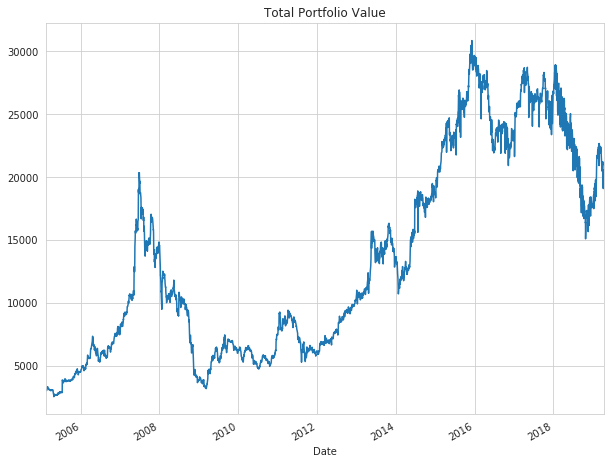

In [36]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

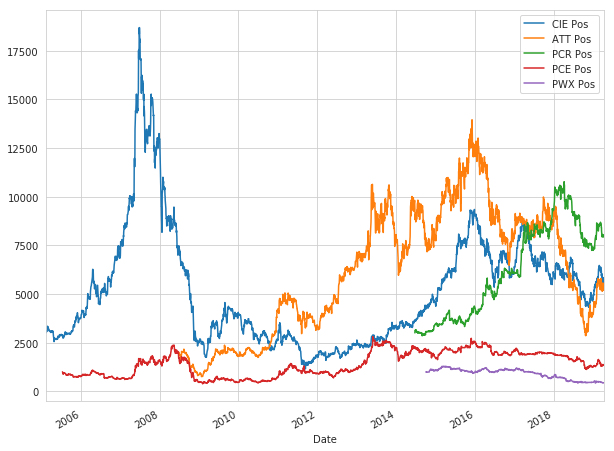

In [37]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

## 1.5 Statystyki dla portfela

### Daily Returns

In [38]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [39]:
portfolio_val['Daily Return'].mean()

0.0008660617511715878

In [40]:
portfolio_val['Daily Return'].std()

0.02562428195367747

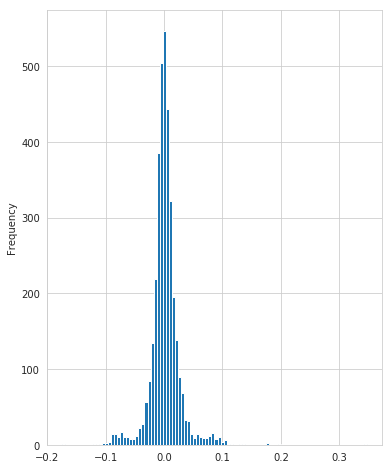

In [41]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(6,8))

### Cumulative Return

In [42]:
cum_ret = 100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)
print("Our return {} was percent!".format(cum_ret))

Our return 583.4662043506855 was percent!


### Avg Daily Return

In [43]:
portfolio_val['Daily Return'].mean()

0.0008660617511715878

### Std Daily Return

In [44]:
portfolio_val['Daily Return'].std()

0.02562428195367747

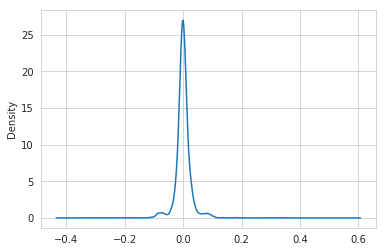

In [45]:
portfolio_val['Daily Return'].plot(kind='kde')

# 1.6 Obliczanie wskaźnika

## Sharpe Ratio
### współczynnik Sharpe'a jest miarą do obliczania zwrotu skorygowanego ryzyko.
### Sharpe Ratio = (Mean portfolio return - Risk-free rate)/Standard deviation of portfolio return
* w poniższych obliczeniach przyjęto Risk-Free rate jako 0% (bo jest bardzo niski % na rachunkach bankowych), ale można wykorzystać 3M LIBOR
#### ** daily_rate = ((1.0 + yearly_rate)**(1/252))-1  przeliczenie stawki rocznej na stawkę dzienną

In [46]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [48]:
SR

0.03379847883102515

## Annualized Sharpe Ratio
### ASR = K-value * SR
### K-values dla różnych okresów:
- Daily = sqrt(255)  dla akcji notowania codzienne
- Weekly = sqrt(52)
- Monthly = sqrt(12)

In [49]:
ASR = (255**0.5)*SR

In [50]:
ASR

0.5397184253657364

### wartość powyżej 1 jest zadowalająca
### powyżej 2 jest bardzo dobrze
### powyżej 3 doskonaly